In [2]:
import pandas as pd
import numpy as np
import graphviz

# Oracle connection to Vanilla PeopleSoft
import cx_Oracle
import sqlalchemy

In [73]:
DATABASE = "HR92U042"
SCHEMA   = "SYSADM"
PASSWORD = "sysadm01"
connstr  = "oracle://{}:{}@{}".format(SCHEMA, PASSWORD, DATABASE)
engine = sqlalchemy.create_engine(connstr)
conn = engine.connect()

LOAD CSV INTO DATABASE

In [2]:
projectdefn_df = pd.read_csv('./PS_Structure/psprojectdefn.csv', sep=',')
projectdefn_df.head()


,PROJECTNAME,VERSION,PROJECTDESCR,TGTSERVERNAME,TGTDBNAME,TGTOPRID,TGTOPRACCT,COMPRELEASE,SRCCOMPRELDTTM,TGTCOMPRELDTTM,...,COMPARETYPE,COMMITLIMIT,REPORTFILTER,MAINTPROJ,LASTUPDDTTM,LASTUPDOPRID,RELEASELABEL,RELEASEDTTM,OBJECTOWNERID,DESCRLONG
0,IFA_EP_036,1,Access to the Report Manager,,HR89PRD,sgiorgi,,,NaN,NaN,...,1,50,16775167,0,12-MAY-08 16.40.47.000000000,sgiorgi,,NaN,,12/05/2008 - Simone Giorgi\r\nAccess to the Re...
1,IFA_EP_FP_32556,1,ePerformance Docum. Status Qry,,HR89SPT,E.ONEILL,,HRMS and Campus Solutions 8.90.00.000,NaN,NaN,...,1,50,16775167,0,02-SEP-11 11.28.38.000000000,E.ONEILL,,NaN,,/*\r\nProject: IFA_EP_FP_32556\r\nDevelop...
2,HRSECVIEWS,1,List of all Security Views R8,,,,,,NaN,NaN,...,1,100,67108863,0,12-FEB-04 14.29.46.000000000,tmurray,,NaN,,This project is a list of all SecViews modifie...
3,IFAD_FIX_ISSUE15_MTP2,1,GP_PI_MNL_ERNDED,,HR89SPT,PS,,,NaN,NaN,...,1,50,16232832,0,25-JUL-06 11.30.45.000000000,PS,,NaN,,This project is a sub-set of the project IFAD_...
4,IFAD_FIX_ISSUE22_MTP1,1,EFT & PI Upload fix,,HR89SPT,PS,,,NaN,NaN,...,1,50,16232832,0,25-JUL-06 11.39.44.000000000,PS,,NaN,,"Andrew Casey, 21/06/2006\r\n - Modified the Pe..."


In [57]:
projectitem_df = pd.read_csv('./PS_Structure/psprojectitem.csv', sep=',')
projectitem_df.head()

,PROJECTNAME,OBJECTTYPE,OBJECTID1,OBJECTVALUE1,OBJECTID2,OBJECTVALUE2,OBJECTID3,OBJECTVALUE3,OBJECTID4,OBJECTVALUE4,NODETYPE,SOURCESTATUS,TARGETSTATUS,UPGRADEACTION,TAKEACTION,COPYDONE
0,UPGCUST,55,99,EMPLOYEE,100,C,101,HC_RUN_FPA501_GBL,0,,0,6,6,2,0,1
1,UPGCUST,55,99,EMPLOYEE,100,C,101,HC_RUN_FPA503_GBL,0,,0,4,2,0,0,1
2,UPGCUST,55,99,EMPLOYEE,100,C,101,HC_RUN_FPA600_GBL,0,,0,6,6,2,0,1
3,UPGCUST,55,99,EMPLOYEE,100,C,101,HC_RUN_FPA_1150_GBL,0,,0,6,6,2,0,1
4,UPGCUST,55,99,EMPLOYEE,100,C,101,HC_RUN_FPA_1210_GBL,0,,0,6,6,2,0,1


In [4]:
    
pspnlgroup_df = pd.read_csv('./data/pspnlgroup.csv', sep=',')

pspnlgroup_df[pspnlgroup_df['PNLGRPNAME'] == 'HRCD_CO_DIRECTORY'][['PNLGRPNAME', 'PNLNAME']]


,PNLGRPNAME,PNLNAME
6200,HRCD_CO_DIRECTORY,HRCD_MAIN
6201,HRCD_CO_DIRECTORY,HRCD_SEARCH
6202,HRCD_CO_DIRECTORY,HRCD_HIDDEN_WRK


In [19]:
# ifa_projects = projectitem_df[projectitem_df['PROJECTNAME'].str.contains('IFA_', regex=True)].copy()
# projectitem_df[(projectitem_df['OBJECTTYPE'] == 44) & (projectitem_df['OBJECTID1'] != 9)]
projectitem_df[(projectitem_df['OBJECTTYPE'] == 47)]

,PROJECTNAME,OBJECTTYPE,OBJECTID1,OBJECTVALUE1,OBJECTID2,OBJECTVALUE2,OBJECTID3,OBJECTVALUE3,OBJECTID4,OBJECTVALUE4,NODETYPE,SOURCESTATUS,TARGETSTATUS,UPGRADEACTION,TAKEACTION,COPYDONE
49625,IFA_ER_CG007,47,10,HRS_CE,39,GBL,1,HRS_APP_CITSHIP,12,RowInit,0,0,0,0,1,0
50562,IFA_EPYE_105,47,10,IFA_EP_APPR_GROUP,39,GBL,1,EP_APPR_SEL_VW,12,RowInit,0,6,6,2,0,0
50563,IFA_EPYE_105,47,10,IFA_EP_APPR_GROUP,39,GBL,1,EP_APPR_SEL_VW,12,RowSelect,0,6,6,2,0,0
50872,IFA_EPYE_007,47,10,IFA_APPRAISAL_MRG,39,GBL,1,IFA_SS_MRG_SRCH,12,SearchInit,0,6,6,2,0,0
51715,IFA_CON,47,10,IFA_CNTRCT_DATA,39,GBL,1,FILE_ATTACH_WRK,12,RowInit,0,6,6,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392766,IFA_ERCS_FP_194325,47,10,IFA_CNTRCT_DATA,39,GBL,1,IFA_CNT_DTA_ADD,12,SearchSave,0,6,6,2,0,0
392767,IFA_ERCS_FP_194325,47,10,IFA_CNTRCT_DATA,39,GBL,1,IFA_CONST_EVAL,12,SavePreChange,0,6,6,2,0,0
392768,IFA_ERCS_FP_194325,47,10,IFA_CNTRCT_DATA,39,GBL,1,IFA_CON_FTP_VW,12,RowInit,0,6,6,2,0,0
392931,IFA_HR_FP_203270,47,10,IFA_RES_OUTCOM_TRK,39,GBL,1,IFA_RES_OTC_HDR,12,SavePostChange,0,4,4,0,1,0


In [13]:
# Page
# projectitem_df[projectitem_df['OBJECTTYPE'] == 7]['OBJECTVALUE1']

projectitem_df[(projectitem_df['OBJECTTYPE'] == 7) & (projectitem_df['OBJECTVALUE1'] == 'HRS_GACT_RCM_STS')].size > 0

True

EXTRACT DATA FROM CSV NOT DATABASE

In [5]:
# select distinct pnlname, subpnlname from pspnlfield where subpnlname > ' ' start with pnlname in ('{in_stmt}') connect by nocycle prior subpnlname = pnlname

pspnlfield_df = pd.read_csv('./data/pspnlfield.csv', sep=',')

pspnlfield_df[(pspnlfield_df['RECNAME'] == 'GPGB_PSLIP_HDR')][['PNLNAME', 'RECNAME']].drop_duplicates()


,PNLNAME,RECNAME
3,GPGB_PSLIP_D_PTXD,GPGB_PSLIP_HDR
88,GPGB_PSLIP_D_NI,GPGB_PSLIP_HDR
1857,GPGB_PSLIP_D_TAX,GPGB_PSLIP_HDR
3848,GPGB_MESS_EE,GPGB_PSLIP_HDR
3901,GPGB_MESS_GRP,GPGB_PSLIP_HDR
6131,GPGB_PSLIP_D_BALS,GPGB_PSLIP_HDR
8101,GPGB_PSLIP_D_RTO,GPGB_PSLIP_HDR
8286,GPGB_PSLIP_D_ERNS,GPGB_PSLIP_HDR
8314,GPGB_PSLIP_D_ATXD,GPGB_PSLIP_HDR
46873,GPGB_PSLIP_GRP,GPGB_PSLIP_HDR


DRILLUP and DRILLDOWN Pages

In [7]:
pspnlfield_df = pd.read_csv('./data/pspnlfield.csv', sep=',')
pspnlgroup_df = pd.read_csv('./data/pspnlgroup.csv', sep=',')


In [25]:
def fget_pages_from_record(recname: str):
    global pspnlfield_df
    # First see if there the record is present in a Page     
    # pnl_sub_df = pspnlfield_df[(pspnlfield_df['FIELDNAME'] != ' ')]
    pnl_sub_df = pspnlfield_df[(pspnlfield_df['RECNAME'] == recname)][['PNLNAME', 'RECNAME']].drop_duplicates()
    pnl_sub_df = pnl_sub_df[(~pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]

    return pnl_sub_df

def fget_subpages_from_record(recname: str):
    global pspnlfield_df
    # sub_rec_df = pspnlfield_df[(pspnlfield_df['FIELDNAME'] != ' ')]
    sub_rec_df = pspnlfield_df[(pspnlfield_df['RECNAME'] == recname)][['PNLNAME', 'RECNAME']].drop_duplicates()
    sub_rec_df = sub_rec_df[(pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]

    return sub_rec_df

In [26]:
fget_pages_from_record('EP_APPR_SECTION')

/tmp/ipykernel_6295/2246190785.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pnl_sub_df = pnl_sub_df[(~pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]


,PNLNAME,RECNAME
26021,EP_APPR_M_EDIT8,EP_APPR_SECTION
42450,EP_APPR_MAIN1,EP_APPR_SECTION
90473,EP_360_REPORT,EP_APPR_SECTION
110154,EP_APPR_SEC_ROLES2,EP_APPR_SECTION
195575,EP_APPR_M_EDIT5,EP_APPR_SECTION


In [46]:
main_df = pspnlfield_df
subpages_series = fget_subpages_from_record('EP_APPR_SECTION')['PNLNAME']
# subpages_series

new_df = main_df[main_df['SUBPNLNAME'].isin(subpages_series)][['PNLNAME', 'SUBPNLNAME']]
concat_df = pd.DataFrame()
while new_df.size > 0:
    concat_df = pd.concat([concat_df, new_df])
    subpages_series = new_df['PNLNAME']
    new_df = main_df[main_df['SUBPNLNAME'].isin(subpages_series)][['PNLNAME', 'SUBPNLNAME']].drop_duplicates()
    
concat_df


/tmp/ipykernel_6295/2246190785.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_rec_df = sub_rec_df[(pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]


,PNLNAME,SUBPNLNAME
41988,EP_APPR_SEC_SBP,EP_APPR_SUM_SBP
42450,EP_APPR_MAIN1,EP_APPR_SEC_SBP
110154,EP_APPR_SEC_ROLES2,EP_APPR_SEC_SBP
42450,EP_APPR_MAIN1,EP_APPR_SEC_SBP
110154,EP_APPR_SEC_ROLES2,EP_APPR_SEC_SBP


In [40]:
subpages_series = fget_subpages_from_record('EP_APPR_SECTION')['PNLNAME']
subpages_series

/tmp/ipykernel_6295/2246190785.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_rec_df = sub_rec_df[(pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]


41530    EP_APPR_SUM_SBP
41800    EP_APPR_SEC_SBP
Name: PNLNAME, dtype: object

In [41]:
main_df = pspnlfield_df
# main_df['SUBPNLNAME'].isin(subpages_series)
new_df = main_df[main_df['SUBPNLNAME'].isin(subpages_series)][['PNLNAME', 'SUBPNLNAME']]
new_df

,PNLNAME,SUBPNLNAME
41988,EP_APPR_SEC_SBP,EP_APPR_SUM_SBP
42450,EP_APPR_MAIN1,EP_APPR_SEC_SBP
110154,EP_APPR_SEC_ROLES2,EP_APPR_SEC_SBP


In [42]:
subpages_series = new_df['PNLNAME']
subpages_series

41988        EP_APPR_SEC_SBP
42450          EP_APPR_MAIN1
110154    EP_APPR_SEC_ROLES2
Name: PNLNAME, dtype: object

In [43]:

# main_df['SUBPNLNAME'].isin(subpages_series)
new_df = main_df[main_df['SUBPNLNAME'].isin(subpages_series)][['PNLNAME', 'SUBPNLNAME']]
new_df

,PNLNAME,SUBPNLNAME
42450,EP_APPR_MAIN1,EP_APPR_SEC_SBP
110154,EP_APPR_SEC_ROLES2,EP_APPR_SEC_SBP


In [44]:
subpages_series = new_df['PNLNAME']
subpages_series

42450          EP_APPR_MAIN1
110154    EP_APPR_SEC_ROLES2
Name: PNLNAME, dtype: object

In [45]:
new_df = main_df[main_df['SUBPNLNAME'].isin(subpages_series)][['PNLNAME', 'SUBPNLNAME']]
new_df

,PNLNAME,SUBPNLNAME


In [39]:
new_df.size

0

In [ ]:
pnl_drillup_df = pd.DataFrame()

main_df = pspnlfield_df

def drillup_pages(main_df, subpage_series):
    global pnl_drillup_df
    print(f"subpage_series:\n{subpage_series}")
    new_df = main_df[main_df['SUBPNLNAME'].isin(subpage_series)][['PNLNAME', 'SUBPNLNAME']]
    print(f"new_df:\nsize:\n{new_df.size} \n{new_df}")
    if new_df.size > 0:
        drillup_pages(main_df, new_df['PNLNAME'])
        print(f"pnl_drillup_df: \n{pnl_drillup_df}")
        pnl_drillup_df = pd.concat([pnl_drillup_df, new_df], ignore_index=True)
    
    print(f"Final pnl_drillup_df: \n{pnl_drillup_df}")

    return

In [ ]:
# DRILLUP subpages until pages. 


sub_pnl_df = drillup_pages(subpages_series)


In [31]:
import csv
import io

lines = []

with open('./data/pspnlfield.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file, delimiter=',')
    for row in reader:
        lines.append(row)

print(f"pspnlfield contains {len(lines)} rows")

pspnlfield contains 316574 rows


In [33]:

Component = 'HRCD_HIDDEN_WRK'
Page = 'HRCD_MAIN'
SubPage = 'HR_OC_GRIDSCRM_SBP' # 'HR_OC_HRCD_SBP' # 'HR_OC_GRIDSCRM_SBP'

page_nodes = []
subpage_nodes = []
edges = []

def drillup_subpage(lines, subpage):
    global subpage_nodes, edges

    # for line in list find subpage as a page
    is_subpanel = False
    for line in lines:
        # if subpage is also a page drillup
        if line['SUBPNLNAME'] == subpage:
            # subpage_nodes.append(line['PNLNAME'])
            is_subpanel = True
            print(f"drillup on subpage {subpage} \n>>>>returns new page {line['PNLNAME']}")
            edges.append([line['PNLNAME'],  line['SUBPNLNAME']])
            subpage_nodes.append(line['SUBPNLNAME'])
            drillup_subpage(lines, line['PNLNAME'])
    if not is_subpanel:
        page_nodes.append(subpage)
    
    print(f'drillUP done for page {SubPage}')

    return 

def drilldown_subpage(lines, page):
    global subpage_nodes, edges
    # for line in list find subpage 
    for line in lines:
        if line['PNLNAME'] == page:
            if line['SUBPNLNAME'] != ' ':
                subpage_nodes.append(line['SUBPNLNAME'])
                edges.append([line['PNLNAME'], line['SUBPNLNAME']])
                drilldown_subpage(lines, line['SUBPNLNAME'])

direction = 'DOWN'
for dict in lines:
    if direction == 'DOWN':
        if dict['PNLNAME'] == Page:
            page_nodes.append(dict['PNLNAME'])
            if dict['SUBPNLNAME'] != ' ':
                edges.append([dict['PNLNAME'], dict['SUBPNLNAME']])
                subpage_nodes.append(dict['SUBPNLNAME'])
                drilldown_subpage(lines, dict['SUBPNLNAME'])
    else:
        if dict['SUBPNLNAME'] == SubPage:
            edges.append([dict['PNLNAME'],  dict['SUBPNLNAME']])
            subpage_nodes.append(dict['SUBPNLNAME'])
            drillup_subpage(lines, dict['PNLNAME'])


print(f"Nodes: {page_nodes}\nSubpage Nodes: {subpage_nodes}\nEdges:\n{edges}")

Nodes: ['HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN', 'HRCD_MAIN']
Subpage Nodes: ['HRCD_SRCHQUICK_SBP', 'HR_OC_XPT_TYPE_SEC', 'HRCD_ELEMENT_CLICK', 'HCSC_TAB_CLICK_SBP', 'HRCD_CHART_SBP', 'HRCD_LIST_SBP', 'HR_OC_HRCD_SBP', 'HR_OC_GRIDSABN_SBP', 'HR_OC_GRIDSCRM_SBP', 'HR_OC_GRIDS_SBP', 'HRCD_PROFILE_SBP']
Edges:
[['HRCD_MAIN', 'HRCD_SRCHQUICK_SBP'], ['HRCD_MAIN', 'HR_OC_XPT_TYPE_SEC'], ['HRCD_MAIN', 'HRCD_ELEMENT_CLICK'], ['HRCD_MAIN', 'HCSC_TAB_CLICK_SBP'], ['HRCD_MAIN', 'HRCD_CHART_SBP'], ['HRCD_CHART_SBP', 'HRCD_LIST_SBP'], ['HRCD_CHART_SBP', 'HR_OC_HRCD_SBP'], ['HR_OC_HRCD_SBP', 'HR_OC_GRIDSABN_SBP'], ['HR_OC_GRIDSABN_SBP', 'HR_OC_GRIDSCRM_SBP'], ['HR_OC_GRIDSCRM_SBP', 'HR_OC_GRIDS_SBP'], ['HRCD_MAIN', 'HRCD_PROFILE_SBP']]


In [65]:
import pandas as pd

names = ['Katie', 'Nik', 'James', 'Evan']
ages = [32, 32, 36, 31]
locations = ['London', 'Toronto', 'Atlanta', 'Madrid']
zipped = [zip(names, ages, locations)]
zipped

In [66]:
dict_of_names = {'PNLNAME' : ['HRCD_MAIN'], 'SUBPNLNAME': ['HRCD_PROFILE_SBP']}
dict_of_names2 = {'PNLNAME' : ['HRCD_MAIN2'], 'SUBPNLNAME': ['HRCD_PROFILE_SBP2']}

list = [('HRCD_MAIN', 'HRCD_PROFILE_SBP')]

test_df = pd.DataFrame(list, columns=['PNLNAME', 'SUBPNLNAME'])


test_df

,PNLNAME,SUBPNLNAME
0,HRCD_MAIN,HRCD_PROFILE_SBP


In [6]:

# pspnlfield_df[(pspnlfield_df['RECNAME'] == 'GPGB_PSLIP_HDR') and ()] #[['PNLNAME', 'RECNAME']].drop_duplicates()
pspnlfield_df = pspnlfield_df[(~pspnlfield_df['PNLNAME'].isin(pspnlfield_df['SUBPNLNAME']))]
pspnlfield_df = pspnlfield_df[(pspnlfield_df['FIELDNAME'] != ' ')]
pspnlfield_df[(pspnlfield_df['RECNAME'] == 'PERSON_NAME')][['PNLNAME', 'RECNAME']].drop_duplicates().count()


PNLNAME    949
RECNAME    949
dtype: int64

In [11]:



def fget_pages_from_subpages(subpage_name_df): 
    pspnlfield_df = pd.read_csv('./data/pspnlfield.csv', sep=',')
    
    if isinstance(subpage_name_df,pd.Series):
        in_stmt = '\', \''.join(subpage_name_df.to_list())
    query = f"""select distinct a.pnlname, a.subpnlname 
                from pspnlfield a 
                where a.subpnlname > ' ' 
                and not exists (select distinct 'Y' from pspnlfield b where a.pnlname = b.subpnlname) 
                start with a.subpnlname in ('{in_stmt}') 
                connect by prior a.pnlname = a.subpnlname
        """
    df_all = pd.read_sql(query, con=engine)
   
    return df_all


REUSABLE FUNCTIONS

In [74]:

# Get Pages in given Component > Component::Page edges
def get_pages_and_component(component_name: str):
    # first query by Component
    query = f"select pnlgrpname, pnlname from pspnlgroup where pnlgrpname = '{component_name}'"
    df_all = pd.read_sql(query, con=engine)
    
    return df_all

# Get Pages in given Component > Component::Page edges
def get_pages_in_component(component_name: str):
    # first query by Component
    query = f"select pnlname from pspnlgroup where pnlgrpname = '{component_name}'"
    df_all = pd.read_sql(query, con=engine)
    
    return df_all

# Get all SubPages in Page > Page::Page edges
def get_subpages_in_page(page_name_df): 
    in_stmt = '\', \''.join(page_name_df['pnlname'].to_list())
    query = f"select distinct pnlname, subpnlname from pspnlfield start with pnlname in ('{in_stmt}') connect by nocycle prior subpnlname = pnlname"
    print(query)
    df_all = pd.read_sql(query, con=engine)
   
    # print(df_all.to_dict())
    # return df_all.fill('a').values.to_list()
    return df_all

# Get Records in a Page > Page::Record::Field edges
def get_recfields_in_pages(pages_df: str):
    in_stmt = '\', \''.join(pages_df['pnlname'].to_list())
    query = f"select distinct pnlname, recname, fieldname from pspnlfield where pnlname in ('{in_stmt}') and fieldname > ' '"
    print(f'get_recfields_in_pages: {query}')
    df_all = pd.read_sql(query, con=engine)
    return df_all

# Get Records in a SubPage > SubPage::Record::Field edges
def get_recfields_in_subpages(pages_df: str):
    in_stmt = '\', \''.join(pages_df['subpnlname'].to_list())
    query = f"select distinct pnlname, recname, fieldname from pspnlfield where pnlname in ('{in_stmt}') and fieldname > ' '"
    print(f'get_recfields_in_subpages: {query}')
    df_all = pd.read_sql(query, con=engine)
    return df_all

# PS Objects
# Component.Page.[SubPages].Record
def get_events_bulk(qry_name, and_clause = ""):
    # PCode events: They follow a path, from the table pspcmprog
    if qry_name == "qry_event_component": # Component.event (PreBuild, PostBuild, SavePostChange, SavePreChange) >> OBJECTID1 = 10, OBJECTID3 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 12" 
    elif qry_name == "qry_event_comp_rec": # Component.Record.event (RowInit, RowInsert, RowDelete, RowSelect, SaveEdit, SavePostChange, SavePreChange)  >> OBJECTID1 = 10, OBJECTID3 = 1 (Record) AND OBJECT4 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 || '.' || OBJECTVALUE4 FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 1 AND OBJECTID4 = 12"
    elif qry_name == "qry_event_comp_rec_field": # Component.Record.Field.event (FieldChange, FieldDefault, FieldEdit, PrePopUp)  >> OBJECTID1 = 10, OBJECTID3 = 1 (Record), OBJECT4 = 2 (Field) AND OBJECT5 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 || '.' || OBJECTVALUE4 || '.' || OBJECTVALUE5 FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 1 AND OBJECTID4 = 2 AND OBJECTID5 = 12"
    elif qry_name == "qry_event_page": # Page.event (Activate) >> OBJECTID1 = 9, OBJECTID2 = 12
        qry_name = "SELECT OBJECTVALUE1 || '.' || OBJECTVALUE2 FROM PSPCMPROG WHERE OBJECTID1 = 9 AND OBJECTID2 = 12"
    elif qry_name == "qry_event_record_field": # Record.event (All... FieldFormula, FieldChange, FieldDefault, FieldEdit, PrePopUp, RowInit, RowInsert, RowDelete, RowSelect, SaveEdit, SavePostChange, SavePreChange, Workflow, SearchSave, SearchInit) >> OBJECTID1 = 1, OBJECTID2 = 2 (Field), OBJECT3 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 FROM PSPCMPROG WHERE OBJECTID1 = 1 AND OBJECTID2 = 2 AND OBJECTID3 = 12"
    elif qry_name == "qry_appPckg_l1": # ApplicationPackage.Class.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 107 (class), OBJECTID3 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 107 AND OBJECTID3 = 12"
    elif qry_name == "qry_appPckg_l2": # ApplicationPackage.SubAppPckg.Class.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 105 (SubPackage), OBJECTID3 107 (class), OBJECTID4 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 || ':' || OBJECTVALUE4 FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 105 AND OBJECTID3 = 107 AND OBJECTID4 = 12"
    elif qry_name == "qry_appPckg_l3": # ApplicationPackage.SubAppPckg.SubAppPckg.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 105 (SubPackage), OBJECTID3 = 106 (SubPackage), OBJECTID4 107 (class), OBJECTID5 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 || ':' || OBJECTVALUE4 || ':' || OBJECTVALUE5 FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 105 AND OBJECTID3 = 106 AND OBJECTID4 = 107 AND OBJECTID5 = 12"
    else:
        exit(0)
    
    if and_clause:
        qry_name = qry_name + and_clause 
    # Query the Database
    df_all = pd.read_sql(qry_name, con=engine)
    return df_all

# Returns dataframe with 1 column, "Path to Event"
# obj_name is a dataframe with one column (Component or Page)
def get_peoplecode_events(qry_name, obj_name):
    
    # PCode events: They follow a path, from the table pspcmprog
    in_stmt = '\', \''.join(obj_name.to_list())
    and_clause = f" and objectvalue1 in ('{in_stmt}')"

    # Component Events
    if qry_name == "qry_event_component": # Component.event (PreBuild, PostBuild, SavePostChange, SavePreChange) >> OBJECTID1 = 10, OBJECTID3 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 as node, (OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3) as EventPath FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 12" 
    elif qry_name == "qry_event_comp_rec": # Component.Record.event (RowInit, RowInsert, RowDelete, RowSelect, SaveEdit, SavePostChange, SavePreChange)  >> OBJECTID1 = 10, OBJECTID3 = 1 (Record) AND OBJECT4 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 || '.' || OBJECTVALUE4 as EventPath FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 1 AND OBJECTID4 = 12"
    elif qry_name == "qry_event_comp_rec_field": # Component.Record.Field.event (FieldChange, FieldDefault, FieldEdit, PrePopUp)  >> OBJECTID1 = 10, OBJECTID3 = 1 (Record), OBJECT4 = 2 (Field) AND OBJECT5 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 || '.' || OBJECTVALUE4 || '.' || OBJECTVALUE5 as EventPath FROM PSPCMPROG WHERE OBJECTID1 = 10 AND OBJECTID3 = 1 AND OBJECTID4 = 2 AND OBJECTID5 = 12"
    # Page Events
    elif qry_name == "qry_event_page": # Page.event (Activate) >> OBJECTID1 = 9, OBJECTID2 = 12
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || '.' || OBJECTVALUE2 as EventPath FROM PSPCMPROG WHERE OBJECTID1 = 9 AND OBJECTID2 = 12"
    # Record Events
    elif qry_name == "qry_event_record_field": # Record.event (All... FieldFormula, FieldChange, FieldDefault, FieldEdit, PrePopUp, RowInit, RowInsert, RowDelete, RowSelect, SaveEdit, SavePostChange, SavePreChange, Workflow, SearchSave, SearchInit) >> OBJECTID1 = 1, OBJECTID2 = 2 (Field), OBJECT3 = 12 (Event)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || '.' || OBJECTVALUE2 || '.' || OBJECTVALUE3 as EventPath  FROM PSPCMPROG WHERE OBJECTID1 = 1 AND OBJECTID2 = 2 AND OBJECTID3 = 12"
    # Application Package Classes
    elif qry_name == "qry_appPckg_l1": # ApplicationPackage.Class.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 107 (class), OBJECTID3 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 as EventPath  FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 107 AND OBJECTID3 = 12"
    elif qry_name == "qry_appPckg_l2": # ApplicationPackage.SubAppPckg.Class.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 105 (SubPackage), OBJECTID3 107 (class), OBJECTID4 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 || ':' || OBJECTVALUE4 as EventPath  FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 105 AND OBJECTID3 = 107 AND OBJECTID4 = 12"
    elif qry_name == "qry_appPckg_l3": # ApplicationPackage.SubAppPckg.SubAppPckg.event (onExecute) >> OBJECTID1 = 104 (Package), OBJECTID2 = 105 (SubPackage), OBJECTID3 = 106 (SubPackage), OBJECTID4 107 (class), OBJECTID5 = 12 (OnExecute)
        qry_name = "SELECT OBJECTVALUE1 as node, OBJECTVALUE1 || ':' || OBJECTVALUE2 || ':' || OBJECTVALUE3 || ':' || OBJECTVALUE4 || ':' || OBJECTVALUE5 as EventPath  FROM PSPCMPROG WHERE OBJECTID1 = 104 AND OBJECTID2 = 105 AND OBJECTID3 = 106 AND OBJECTID4 = 107 AND OBJECTID5 = 12"
    else:
        exit(0)
    
    # optional AND Clause
    if and_clause:
        qry_name = qry_name + and_clause 

    # Query the Database
    df_all = pd.read_sql(qry_name, con=engine)
    return df_all

def get_events(obj_type, obj_name):
    
    if obj_type == '10': # component level events
        df_all = get_events_bulk("qry_event_component", f" and objectvalue1 = '{obj_name}'")
    elif obj_type == '9': # page level events
        df_all = get_events_bulk("qry_event_page", f" and objectvalue1 = '{obj_name}'")
    elif obj_type == '1': # Record level events
        df_all = get_events_bulk("qry_event_record_field", f" and objectvalue1 = '{obj_name}'")
    else:
        exit(0)

    return df_all

# From App Designer report we can extract event calls to Functions and imports from App Packages
# filter Declare Function *
# Record.event (FieldFormula,... but it can be located in different events actually) >> OBJECTID1 = 1, OBJECTID2 = 2 (Field), OBJECT3 = 12 (Event)
# Identify Node containing the event by Path

# filter Import *
# Identify Node containing the event by Path-


In [75]:

df_pages = get_pages_in_component('HRCD_CO_DIRECTORY')
df_subpages = get_subpages_in_page(df_pages)
# df_recfields = get_recfields_in_pages(df_subpages[df_subpages['subpnlname'] != ' '])
df_recfields = get_recfields_in_pages(df_pages[df_pages['pnlname'] != ' '])

# get_recfields_in_pages('HRCD_MAIN')
# df[df['subpnlname'] != ' ']['subpnlname']
# get_recfields_in_pages(df[df['subpnlname'] != ' '])


df_pages
# df_recfields
# get_events('qry_appPckg_l2')


# How to select unique by column and convert to list
df_rec = df_recfields.recname.unique()
df_rec.tolist()


select distinct pnlname, subpnlname from pspnlfield start with pnlname in ('HRCD_HIDDEN_WRK', 'HRCD_MAIN', 'HRCD_SEARCH') connect by nocycle prior subpnlname = pnlname
get_recfields_in_pages: select distinct pnlname, recname, fieldname from pspnlfield where pnlname in ('HRCD_HIDDEN_WRK', 'HRCD_MAIN', 'HRCD_SEARCH') and fieldname > ' '


['DERIVED_HRCD_MN',
 'DERIVED_HRCD_PR',
 'HRCD_SRCH_VW',
 'DERIVED_CO',
 'DERIVED_HRCD_XP',
 'DERIVED_TAB',
 'PERSON_NAME']

In [76]:
query = """
select level, pnlname, pnlfieldname, fieldtype, label_id, lbltext, recname, fieldname, subpnlname
from pspnlfield 
start with pnlname = 'HRCD_CO_DIRECT_FL'
connect by nocycle prior subpnlname = pnlname
"""
# 'HRCD_CO_DIRECT_FL' 
# 'HR_EE_INF_HOME'

df_all = pd.read_sql(query, con=conn)

TEST DIRECT GRAPH:
- PREPARE LIST FOR NODES AND EDGES
- CREATE DIGRAPH

In [77]:
# Directed Graph
page_node = []
page_edge = []
record_node = []
record_edge = []

page_df = df_all[df_all["subpnlname"] != " "][["pnlname", "subpnlname"]]
for index, row in page_df.iterrows():
    page_node.append(str(row["pnlname"]))
    page_node.append(str(row["subpnlname"]))
    page_edge.append((str(row["pnlname"]), str(row["subpnlname"])))

    rec_df = df_all[((df_all["recname"] != " ") & (df_all["pnlname"] == str(row["pnlname"])))][["pnlname", "recname", "fieldname"]]
    if len(rec_df.index) > 0:
        for rec_idx, rec_row in rec_df.iterrows():
            record_node.append(str(rec_row["recname"]))
            # record_node.append(str(index), str(row["subpnlname"]))
            record_edge.append((str(rec_row["pnlname"]), str(rec_row["recname"])))

record_node_dict = dict.fromkeys(record_node)
record_node = list(record_node_dict)
record_edge_dict = dict.fromkeys(record_edge)
record_edge = list(record_edge_dict)

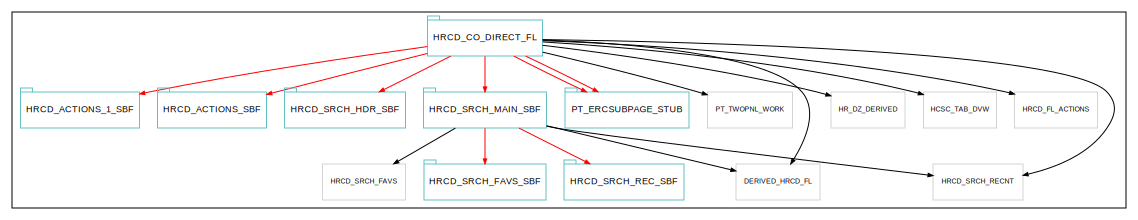

In [78]:
# Preview: Do not need to run!!
f = graphviz.Digraph('Pages and Records', comment='The Round Table')

f.attr('node', {'fontname':'Helvetica,Arial,sans-serif', 'color':'#61c2c5', 'fontsize':'9'})
f.attr('edge', {'arrowsize':'0.5', 'weight':'1'})

# f.attr(rankdir='LR', size='8,5')
with f.subgraph(name="cluster_pages") as pages:
    # 
    pages.attr('node', shape='tab', group='Page')
    # Add Page Nodes
    for page in page_node:
        pages.node(page)
    # Add Page Edges
    for p1, p2 in page_edge:
        pages.edge(p1, p2, label='', color='red')
    # pages.attr(label = 'Pages')

with f.subgraph(name="cluster_pages") as records:
    
    records.attr('node', shape='rectangle', color='lightgrey', rank='same', fontsize = '7' ,group='Record')
    for rec in record_node:
        records.node(rec)
    for p, rec in record_edge:
        records.edge(p, rec, row = 'Recs') # ,  constraint='false'
    # records.attr(label = 'Records')

# print(f.source)
f


TEST DIRECT GRAPH PEOPLECODE EVENTS AND APP PACKAGES FROM APP DESIGNER REPORT TEXT FILE:
- READ FILE AND PARSE IT INTO OBJECT LIST, PACKAGE LIST AND FUNCTION LIST
- CONVERT LISTS TO DATAFRAMES
- VARIOUS TRANSFORMATIONS WITH LISTS
- CREATE DIGRAPH

In [1]:
import pandas as pd

In [19]:
# parse P42_pcode_utf8.txt!
obj_list = []
pkg_list = []
fcall_list = []
func_list = []
with open('./data/P42_pcode_utf8.txt', 'r') as file_p42:
# with open('./data/IFAUAT_pcode_utf8.txt', 'r') as file_p42:
    event_idx = 0
    for line in file_p42:
        if line.startswith('['):
            event_idx += 1
            obj_list.append([str(event_idx)]+line[1:len(line)-2].split('.'))
        # parse Application Packages Calls "^import "
        if line.startswith('import '):
            pkg_list.append([str(event_idx)]+line[7:line.find(';')].split(':'))
        # parse FieldFormula calls "^Declare Function "
        if line.startswith('Declare Function '):
            fcall_list.append([str(event_idx)]+line[17:line.find(';')].split(' '))
        # parse Function definition "^Function "
        if line.startswith('Function '):
            func_list.append([str(event_idx), line[9:line.find('(')]])


# obj_list

In [26]:
# obj_df = pd.DataFrame(obj_list, columns=['Index', 'Record', 'Field', 'event', 'field4', 'field5']).fillna(' ')
# obj_df = pd.DataFrame(obj_list, columns=['id', 'key1', 'key2', 'key3', 'key4', 'key5', 'key6', 'key7']).fillna(' ')
obj_df = pd.DataFrame(obj_list, columns=['id', 'key1', 'key2', 'key3', 'key4', 'key5']).fillna(' ')
# pkg_imp_df = pd.DataFrame(pkg_list, columns=['id', 'key1', 'key2', 'key3', 'key4']).fillna(' ')
# func_call_df = pd.DataFrame(fcall_list, columns=['id', 'key1', 'key2', 'key3', 'key4']).fillna(' ')
# func_defn_df = pd.DataFrame(func_list, columns=['id', 'key1']).fillna(' ')

# Copy to csv for analisys
obj_df.to_csv('obj_df_8859.csv')
# pkg_imp_df.to_csv('pkg_imp_df.csv')
# func_call_df.to_csv('func_call_df.csv')
# func_defn_df.to_csv('func_defn_df.csv')

ValueError: 6 columns passed, passed data had 8 columns

In [85]:
# Example getting App Packages imports in Component PeopleCode events for HRCD_CO_DIRECTORY

cmp_pnl_df = get_pages_and_component('HRCD_CO_DIRECTORY')

cmp_events_df = get_peoplecode_events('qry_event_component', cmp_pnl_df['pnlgrpname'])
# cmp_events_df.rename(columns = {'node':'Node'}, inplace = True)
# cmp_events_df.rename(columns = {'eventpath':'Edge'}, inplace = True)
print(f'Component Events dataframe \n {cmp_events_df}')
# Get Application Packages imported in component peoplecode events
new_event_df = cmp_events_df.eventpath.str.split('.', expand=True).copy()
print(f'\nsplitted dataframe \n {new_event_df}')

# important: we know how many keys we're using from the full event path.
new_columns = []
for col in new_event_df.columns:
    col = col + 1
    new_columns.append(f'key{col}')

new_event_df.columns = new_columns

# # Note: it will create a new Dataframe
# Note 2: list of keys may differ depending on the type of object
# selected_obj_df = pd.merge(obj_df, new_event_df, how='inner', left_on=['key1','key2','key3'], right_on=['key1','key2','key3'])
selected_obj_df = pd.merge(obj_df, new_event_df, how='inner', left_on=new_columns, right_on=new_columns)

obj_app_pkg = pkg_imp_df[pkg_imp_df['id'].isin(selected_obj_df['id'])]

print(f'\nImports found in those events \n {obj_app_pkg}')

full_df = pd.merge(obj_df, obj_app_pkg, how='inner', on='id')

test_df = pd.DataFrame()
test_df['event'] = full_df['key1_x'] + '.' + full_df['key2_x'] + '.' + full_df['key3_x']
test_df['import'] = full_df['key1_y'] + '.' + full_df['key2_y'] + '.' + full_df['key3_y']
test_df

Component Events dataframe 
                 node                             eventpath
0  HRCD_CO_DIRECTORY       HRCD_CO_DIRECTORY.GBL.PostBuild
1  HRCD_CO_DIRECTORY        HRCD_CO_DIRECTORY.GBL.PreBuild
2  HRCD_CO_DIRECTORY  HRCD_CO_DIRECTORY.GBL.SavePostChange
3  HRCD_CO_DIRECTORY   HRCD_CO_DIRECTORY.GBL.SavePreChange

splitted dataframe 
                    0    1               2
0  HRCD_CO_DIRECTORY  GBL       PostBuild
1  HRCD_CO_DIRECTORY  GBL        PreBuild
2  HRCD_CO_DIRECTORY  GBL  SavePostChange
3  HRCD_CO_DIRECTORY  GBL   SavePreChange

Imports found in those events 
           id                    key1              key2 key3 key4
13183  63625  HRCD_COMPANY_DIRECTORY    ControllerBase          
13184  63626  HRCD_COMPANY_DIRECTORY    ControllerBase          
13185  63626  HRCD_COMPANY_DIRECTORY   UserSessionBase          
13186  63626                      EO  ApplicationClass    *     
13187  63626  HRCD_COMPANY_DIRECTORY         ReturnNav          
13188  63626         

,event,import
0,HRCD_CO_DIRECTORY.GBL.PostBuild,HRCD_COMPANY_DIRECTORY.ControllerBase.
1,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.ControllerBase.
2,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.UserSessionBase.
3,HRCD_CO_DIRECTORY.GBL.PreBuild,EO.ApplicationClass.*
4,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.ReturnNav.
5,HRCD_CO_DIRECTORY.GBL.PreBuild,HR_ABN.ABNUrlUtility.
6,HRCD_CO_DIRECTORY.GBL.PreBuild,CO_NAVIGATN.Stack.
7,HRCD_CO_DIRECTORY.GBL.SavePreChange,HRCD_COMPANY_DIRECTORY.ControllerBase.


In [109]:
test_df = pd.merge(obj_df, obj_app_pkg, how='inner', on='id')

test_df['event'] = test_df['key1_x'] + '.' + test_df['key2_x'] + '.' + test_df['key3_x']
test_df['import'] = test_df['key1_y'] + '.' + test_df['key2_y'] + '.' + test_df['key3_y']

test_df

,id,key1_x,key2_x,key3_x,key4_x,key5,key1_y,key2_y,key3_y,key4_y,event,import
0,63625,HRCD_CO_DIRECTORY,GBL,PostBuild,,,HRCD_COMPANY_DIRECTORY,ControllerBase,,,HRCD_CO_DIRECTORY.GBL.PostBuild,HRCD_COMPANY_DIRECTORY.ControllerBase.
1,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,HRCD_COMPANY_DIRECTORY,ControllerBase,,,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.ControllerBase.
2,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,HRCD_COMPANY_DIRECTORY,UserSessionBase,,,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.UserSessionBase.
3,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,EO,ApplicationClass,*,,HRCD_CO_DIRECTORY.GBL.PreBuild,EO.ApplicationClass.*
4,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,HRCD_COMPANY_DIRECTORY,ReturnNav,,,HRCD_CO_DIRECTORY.GBL.PreBuild,HRCD_COMPANY_DIRECTORY.ReturnNav.
5,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,HR_ABN,ABNUrlUtility,,,HRCD_CO_DIRECTORY.GBL.PreBuild,HR_ABN.ABNUrlUtility.
6,63626,HRCD_CO_DIRECTORY,GBL,PreBuild,,,CO_NAVIGATN,Stack,,,HRCD_CO_DIRECTORY.GBL.PreBuild,CO_NAVIGATN.Stack.
7,63628,HRCD_CO_DIRECTORY,GBL,SavePreChange,,,HRCD_COMPANY_DIRECTORY,ControllerBase,,,HRCD_CO_DIRECTORY.GBL.SavePreChange,HRCD_COMPANY_DIRECTORY.ControllerBase.


In [52]:
new_event_df.key1[0] = 'test'
new_event_df

,key1,key2,key3
0,test,GBL,PostBuild
1,HRCD_CO_DIRECTORY,GBL,PreBuild
2,HRCD_CO_DIRECTORY,GBL,SavePostChange
3,HRCD_CO_DIRECTORY,GBL,SavePreChange


In [11]:
# TEST LISTS TRANSFORMATIONS
# boolean indexing
key1_df = obj_df[obj_df['key1'] == 'HRCD_CO_DIRECT_FL'].copy(deep=True)
columns = []
key1_df.columns

Index(['id', 'key1', 'key2', 'key3', 'key4', 'key5'], dtype='object')

In [2]:
# TEST LISTS NAVIGATION
for row in obj_list:
    id = ''
    if row[1] == 'HRCD_CO_DIRECT_FL':
        id = row[0]
        print('Got an ID for HRCD_CO_DIRECT_FL: {} from Row {}'.format(id, row))
    if id:
        for pckg in pkg_list:
            if pckg[0] == id:
                print('App Package: {}'.format(pckg))

Got an ID for HRCD_CO_DIRECT_FL: 47510 from Row ['47510', 'HRCD_CO_DIRECT_FL', 'Activate']
App Package: ['47510', 'HRCD_COMPANY_DIRECTORY_FL', 'UI', 'CDMain']
App Package: ['47510', 'HRCD_COMPANY_DIRECTORY_FL', 'UserSessionCDFL']
Got an ID for HRCD_CO_DIRECT_FL: 63538 from Row ['63538', 'HRCD_CO_DIRECT_FL', 'GBL', 'DERIVED_HRCD_FL', 'HRCD_ACTION_LNK', 'FieldChange']
App Package: ['63538', 'HRCD_COMPANY_DIRECTORY_FL', 'UserSessionCDFL']
App Package: ['63538', 'HRCD_COMPANY_DIRECTORY_FL', 'UI', 'CDCommon']
App Package: ['63538', 'HRCD_COMPANY_DIRECTORY_FL', 'UI', 'CDMain']
App Package: ['63538', 'HRBP_UTILS', 'EmployeeTeams']
Got an ID for HRCD_CO_DIRECT_FL: 63539 from Row ['63539', 'HRCD_CO_DIRECT_FL', 'GBL', 'DERIVED_HRCD_FL', 'HRCD_NAME_LINK', 'FieldChange']
App Package: ['63539', 'HRCD_COMPANY_DIRECTORY_FL', 'UI', 'CDMain']
App Package: ['63539', 'HRBP_UTILS', 'EmployeeTeams']
Got an ID for HRCD_CO_DIRECT_FL: 63540 from Row ['63540', 'HRCD_CO_DIRECT_FL', 'GBL', 'DERIVED_HRCD_FL', 'HR

In [19]:
# TEST LIST TRANSFORMATIONS

# Example of graphviz from HRCD_FL_ACTIONS (Found in HRCD_CO_DIRECT_FL)
# Get a list of events (nodes) from obj_df related to a Record. 
# And Edge them to Function Calls (nodes) and App Package Imports (nodes).
# Link them by Id (column 0) 
# Directed Graph

rec_node = []
func_nodes = []
pkg_nodes = []
rec_edges = []

rec_node = ['HRCD_CO_DIRECT_FL']

for rec in obj_list:
    id = ''
    if rec[1] == 'HRCD_CO_DIRECT_FL':
        id = rec[0]
        print('Got an ID for HRCD_CO_DIRECT_FL: {} from Row {}'.format(id, row))
        rec_ = '.'.join(rec[1:])
        rec_node.append(rec_)
    if id:
        for pckg in pkg_list:
            if pckg[0] == id:
                pckg_ = '.'.join(pckg[1:])
                print('App Package: {}'.format('.'.join(pckg[1:])))
                pkg_nodes.append(pckg_)
                rec_edges.append([rec_, pckg_])


record_node_dict = dict.fromkeys(rec_node)
rec_node = list(record_node_dict)
pkg_nodes_dict = dict.fromkeys(pkg_nodes)
pkg_nodes = list(pkg_nodes_dict)

Got an ID for HRCD_CO_DIRECT_FL: 47510 from Row pnlname        HRCD_CO_DIRECT_FL
subpnlname    PT_ERCSUBPAGE_STUB
Name: 125, dtype: object
App Package: HRCD_COMPANY_DIRECTORY_FL.UI.CDMain
App Package: HRCD_COMPANY_DIRECTORY_FL.UserSessionCDFL
Got an ID for HRCD_CO_DIRECT_FL: 63538 from Row pnlname        HRCD_CO_DIRECT_FL
subpnlname    PT_ERCSUBPAGE_STUB
Name: 125, dtype: object
App Package: HRCD_COMPANY_DIRECTORY_FL.UserSessionCDFL
App Package: HRCD_COMPANY_DIRECTORY_FL.UI.CDCommon
App Package: HRCD_COMPANY_DIRECTORY_FL.UI.CDMain
App Package: HRBP_UTILS.EmployeeTeams
Got an ID for HRCD_CO_DIRECT_FL: 63539 from Row pnlname        HRCD_CO_DIRECT_FL
subpnlname    PT_ERCSUBPAGE_STUB
Name: 125, dtype: object
App Package: HRCD_COMPANY_DIRECTORY_FL.UI.CDMain
App Package: HRBP_UTILS.EmployeeTeams
Got an ID for HRCD_CO_DIRECT_FL: 63540 from Row pnlname        HRCD_CO_DIRECT_FL
subpnlname    PT_ERCSUBPAGE_STUB
Name: 125, dtype: object
App Package: HRCD_COMPANY_DIRECTORY_FL.Search.BUS.SesSearch


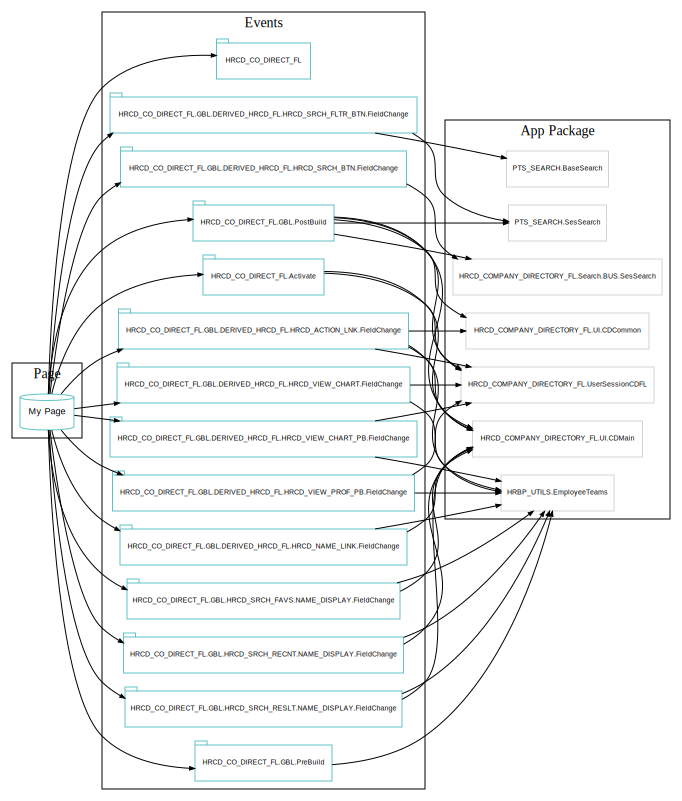

In [20]:
# CREATE THE DIRECT GRAPH FROM LISTS

# start the object
dot = graphviz.Digraph('Pages and Records', comment='The Round Table')

dot.attr('node', {'fontname':'Helvetica,Arial,sans-serif', 'color':'#61c2c5', 'fontsize':'9'})
dot.attr('edge', {'arrowsize':'0.5', 'weight':'1'})
dot.attr(rankdir='LR')

# style definitions
input_style = {'color':'plum', 'style':'filled'}
event_style = {'shape': 'tab', 'rank': 'same', 'fontsize': '7', 'group': 'Page'}
component_style = {'shape': 'cylinder', 'group': 'Component'}
appPckg_style = {'shape': 'rectangle', 'color': 'lightgrey', 'rank': 'same', 'fontsize': '7' ,'group': 'Record'}

# input data
with dot.subgraph(name="cluster_components") as component:
    component.attr(label='Page')
    component.attr('node', component_style)
    
    component.node("My Page")
    for node in rec_node:
        component.edge("My Page", node, row = 'Component')
    
    # nested clusters
    with dot.subgraph(name="cluster_events") as events:
        events.attr(label='Events') 
        events.attr('node', event_style)
        # Add Event Nodes
        for node in rec_node:
            events.node(node)

    with dot.subgraph(name="cluster_packages") as appPckg:
        appPckg.attr(label='App Package')
        appPckg.attr('node', appPckg_style)
        for pkg in pkg_nodes:
            appPckg.node(pkg)
        for p, rec in rec_edges:
            appPckg.edge(p, rec, row = 'Recs') # ,  constraint='false'



# print(dot.source)
dot

NEW DESIGN WITH DATAFRAMES (NOT LISTS) USING METHODS FROM ABOVE TO RETRIEVE PAGES, SUBPAGES AND RECORDS

In [21]:
# TODO: Refactor this code so I get dataframes instead of lists
# This only extracts information from app designer report.

# parse P42_pcode_utf8.txt!
obj_list = []
pkg_list = []
fcall_list = []
func_list = []
with open('./reports/P42_pcode_utf8.txt', 'r') as file_p42:
    event_idx = 0
    for line in file_p42:
        if line.startswith('['):
            event_idx += 1
            obj_list.append([str(event_idx)]+line[1:len(line)-2].split('.'))
        # parse Application Packages Calls "^import "
        if line.startswith('import '):
            pkg_list.append([str(event_idx)]+line[7:line.find(';')].split(':'))
        # parse FieldFormula calls "^Declare Function "
        if line.startswith('Declare Function '):
            fcall_list.append([str(event_idx)]+line[17:line.find(';')].split(' '))
        # parse Function definition "^Function "
        if line.startswith('Function '):
            func_list.append([str(event_idx), line[9:line.find('(')]])

# obj_df = pd.DataFrame(obj_list, columns=['Index', 'Record', 'Field', 'event', 'field4', 'field5']).fillna(' ')
obj_df = pd.DataFrame(obj_list, columns=['id', 'key1', 'key2', 'key3', 'key4', 'key5']).fillna(' ')
pkg_imp_df = pd.DataFrame(pkg_list, columns=['id', 'key1', 'key2', 'key3', 'key4']).fillna(' ')
func_call_df = pd.DataFrame(fcall_list, columns=['id', 'key1', 'key2', 'key3', 'key4']).fillna(' ')
func_defn_df = pd.DataFrame(func_list, columns=['id', 'key1']).fillna(' ')

# Example of graphviz from HRCD_FL_ACTIONS (Found in HRCD_CO_DIRECT_FL)
# Get a list of events (nodes) from obj_df related to a Record. 
# And Edge them to Function Calls (nodes) and App Package Imports (nodes).
# Link them by Id (column 0) 
# Directed Graph

rec_node = []
func_nodes = []
pkg_nodes = []
rec_edges = []

rec_node = ['HRCD_CO_DIRECT_FL']

for rec in obj_list:
    id = ''
    if rec[1] == 'HRCD_CO_DIRECT_FL':
        id = rec[0]
        print('Got an ID for HRCD_CO_DIRECT_FL: {} from Row {}'.format(id, row))
        rec_ = '.'.join(rec[1:])
        rec_node.append(rec_)
    if id:
        for pckg in pkg_list:
            if pckg[0] == id:
                pckg_ = '.'.join(pckg[1:])
                print('App Package: {}'.format('.'.join(pckg[1:])))
                pkg_nodes.append(pckg_)
                rec_edges.append([rec_, pckg_])


record_node_dict = dict.fromkeys(rec_node)
rec_node = list(record_node_dict)
pkg_nodes_dict = dict.fromkeys(pkg_nodes)
pkg_nodes = list(pkg_nodes_dict)

['HRCD_CO_DIRECT_FL',
 'HRCD_CO_DIRECT_FL.Activate',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_ACTION_LNK.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_NAME_LINK.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_SRCH_BTN.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_SRCH_FLTR_BTN.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_VIEW_CHART.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_VIEW_CHART_PB.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.DERIVED_HRCD_FL.HRCD_VIEW_PROF_PB.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.HRCD_SRCH_FAVS.NAME_DISPLAY.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.HRCD_SRCH_RECNT.NAME_DISPLAY.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.HRCD_SRCH_RESLT.NAME_DISPLAY.FieldChange',
 'HRCD_CO_DIRECT_FL.GBL.PostBuild',
 'HRCD_CO_DIRECT_FL.GBL.PreBuild']